### Creating a Machine Learning model to determine the quality of the wine

#### Importing libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#### Reading the dataset

In [6]:


df = pd.read_csv('data/white.csv', sep=';')

In [7]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   
6                 30.0                 136.0   0.9949  3.18       0.47   
7                 45.0                 170.0   1.0010  3.00       0.45   
8                 14.0                 132.0   0.9940  3.30       0.49   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6  
5     10.1        6  
6      9.6        6  
7      8.8        6  
8      9.5        6  
9     11.0        6

In [8]:
df['color'] = 'white'

In [9]:
df.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   
7            7.0              0.27         0.36            20.7      0.045   
8            6.3              0.30         0.34             1.6      0.049   
9            8.1              0.22         0.43             1.5      0.044   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   
6                 30.0                 136.0   0.9949  3.18       0.47   
7                 45.0                 170.0   1.0010  3.00       0.45   
8                 14.0                 132.0   0.9940  3.30       0.49   
9                 28.0                 129.0   0.9938  3.22       0.45   

   alcohol  quality  color  
0      8.8        6  white  
1      9.5        6  white  
2     10.1        6  white  
3      9.9        6  white  
4      9.9        6  white  
5     10.1        6  white  
6      9.6        6  white  
7      8.8        6  white  
8      9.5        6  white  
9     11.0        6  white

#### Description of the dataset

In [10]:
df.describe().transpose()

count        mean        std      min         25%  \
fixed acidity         4898.0    6.854788   0.843868  3.80000    6.300000   
volatile acidity      4898.0    0.278241   0.100795  0.08000    0.210000   
citric acid           4898.0    0.334192   0.121020  0.00000    0.270000   
residual sugar        4898.0    6.391415   5.072058  0.60000    1.700000   
chlorides             4898.0    0.045772   0.021848  0.00900    0.036000   
free sulfur dioxide   4898.0   35.308085  17.007137  2.00000   23.000000   
total sulfur dioxide  4898.0  138.360657  42.498065  9.00000  108.000000   
density               4898.0    0.994027   0.002991  0.98711    0.991723   
pH                    4898.0    3.188267   0.151001  2.72000    3.090000   
sulphates             4898.0    0.489847   0.114126  0.22000    0.410000   
alcohol               4898.0   10.514267   1.230621  8.00000    9.500000   
quality               4898.0    5.877909   0.885639  3.00000    5.000000   

                            50%       75%        max  
fixed acidity           6.80000    7.3000   14.20000  
volatile acidity        0.26000    0.3200    1.10000  
citric acid             0.32000    0.3900    1.66000  
residual sugar          5.20000    9.9000   65.80000  
chlorides               0.04300    0.0500    0.34600  
free sulfur dioxide    34.00000   46.0000  289.00000  
total sulfur dioxide  134.00000  167.0000  440.00000  
density                 0.99374    0.9961    1.03898  
pH                      3.18000    3.2800    3.82000  
sulphates               0.47000    0.5500    1.08000  
alcohol                10.40000   11.4000   14.20000  
quality                 6.00000    6.0000    9.00000

#### Retrieving information about the dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  color                 4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


#### Unique colors in the dataset

In [12]:
df['color'].unique()

array(['white'], dtype=object)

In [13]:
df.count()

fixed acidity           4898
volatile acidity        4898
citric acid             4898
residual sugar          4898
chlorides               4898
free sulfur dioxide     4898
total sulfur dioxide    4898
density                 4898
pH                      4898
sulphates               4898
alcohol                 4898
quality                 4898
color                   4898
dtype: int64

In [14]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

#### Checking if there is any missing value in the dataset

In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

*We can see that there no missing values in the dataset*

#### Defining function to create boxplots and distplots

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


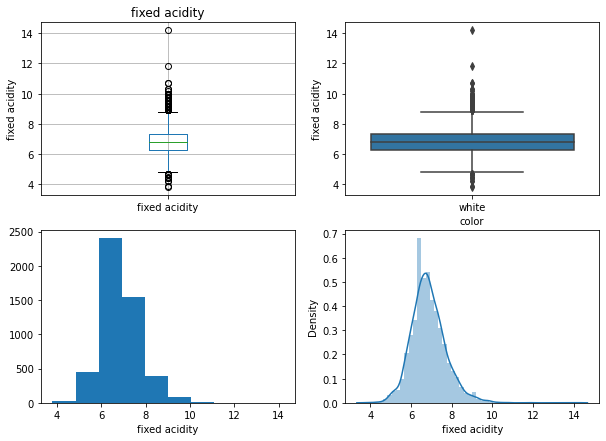

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


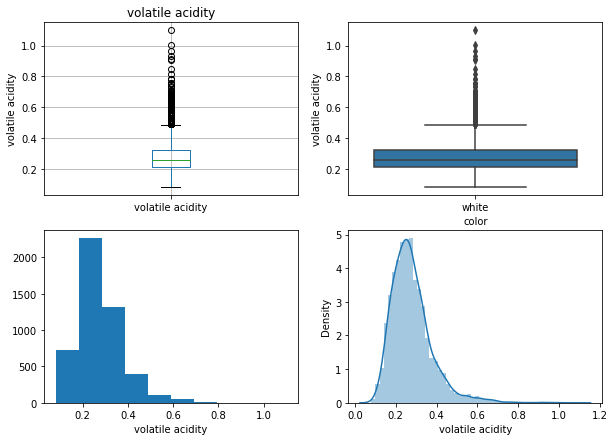

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


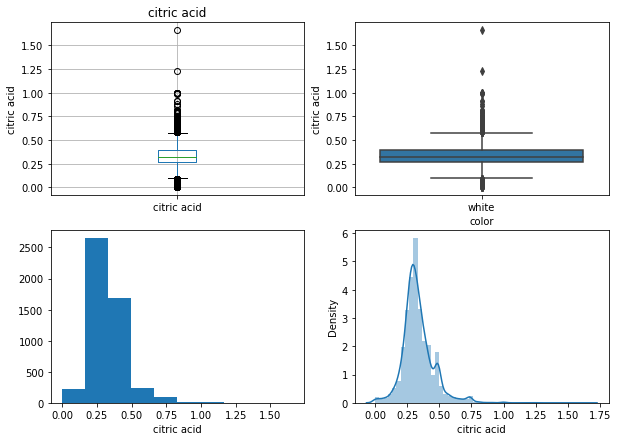

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


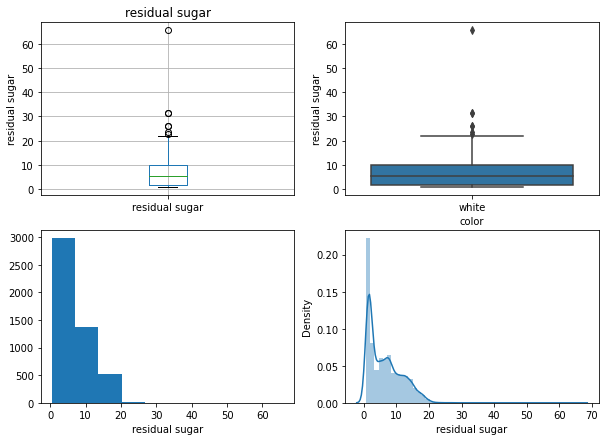

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


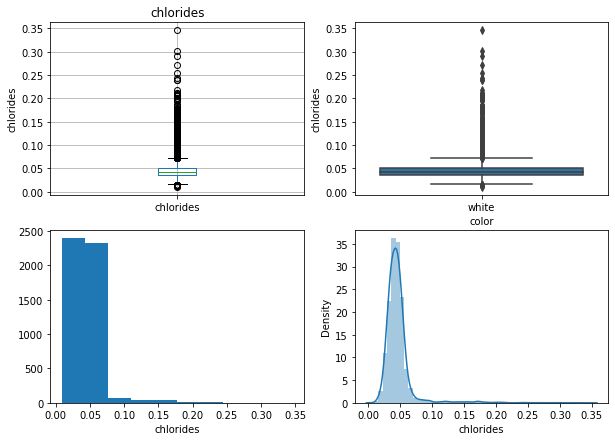

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


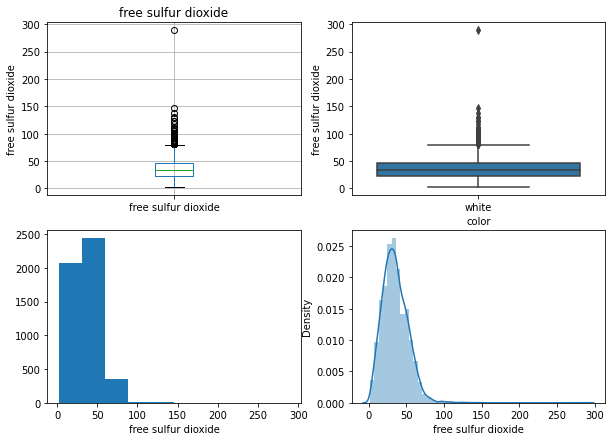

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


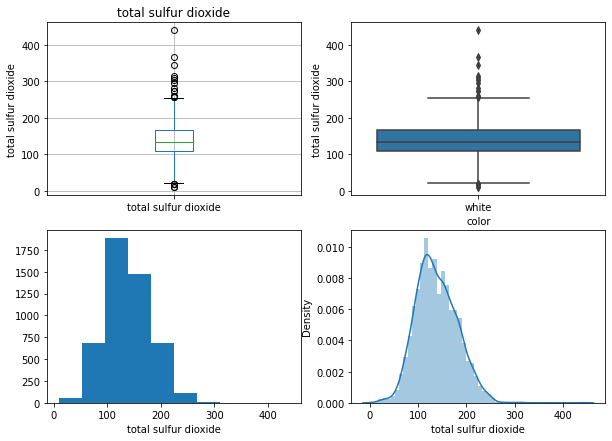

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


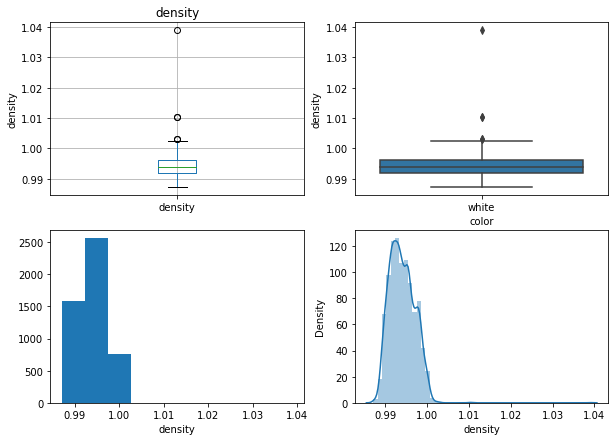

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


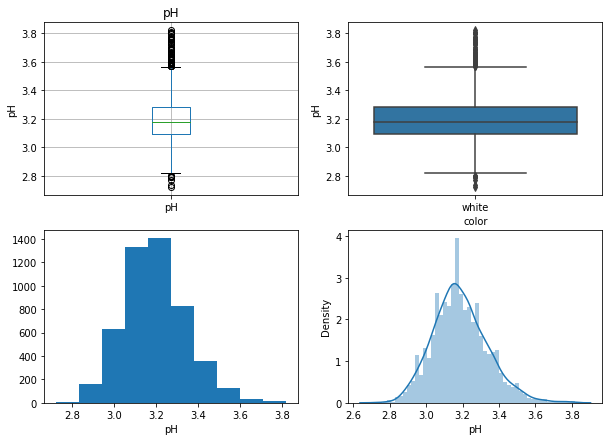

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


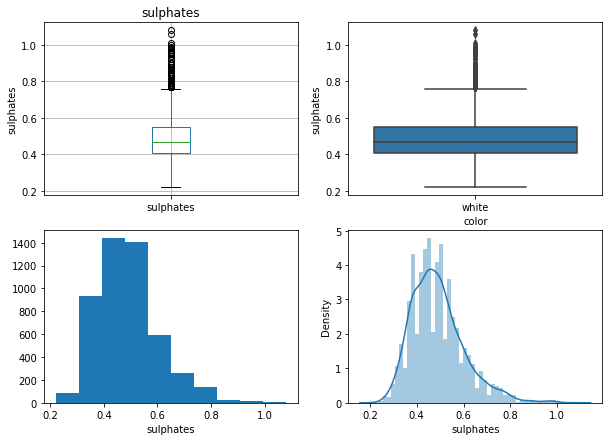

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


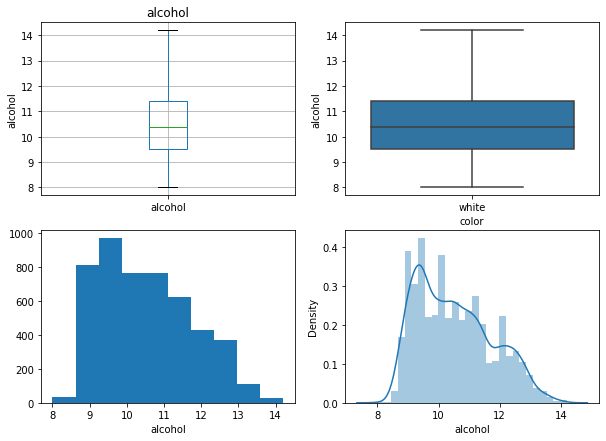

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


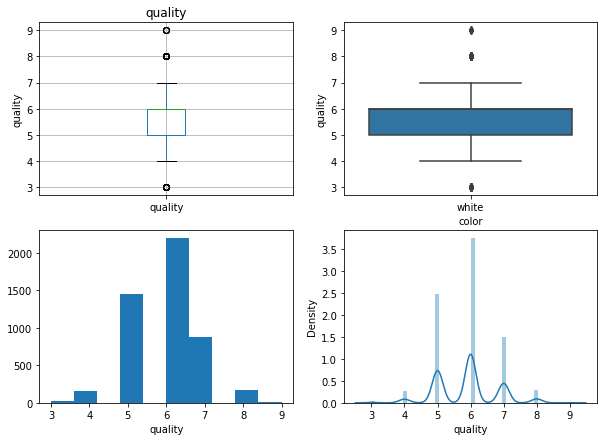

In [16]:

def create_boxplots_distplots(dataset):
    features = [feature for feature in dataset.columns if feature != 'color']
    for feature in features:
        plt.figure(figsize=(10,7))
        plt.subplot(2,2,1)
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.subplot(2,2,2)
        sns.boxplot(x=dataset['color'], y=dataset[feature])
        plt.subplot(2,2,3)
        plt.hist(dataset[feature])
        plt.xlabel(feature)
        plt.subplot(2,2,4)
        sns.distplot(dataset[feature].dropna())
        plt.show()
    
create_boxplots_distplots(df)

We can see from the boxplots that there are outliers. So we need to to handle these outliers.

#### Defining function to handle outliers

*Using 3xIQR for features having extreme oultiers and high skewness*

In [17]:
def remove_extreme_outliers(dataset, list_of_features):
    for feature in list_of_features:
        if feature != 'color':
            IQR = dataset[feature].quantile(0.75)-dataset[feature].quantile(0.25)
            lower_bridge = dataset[feature].quantile(0.25) - IQR*(3)
            upper_bridge = dataset[feature].quantile(0.75) + IQR*(3)
            #print(lower_bridge, upper_bridge)
            dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
            if lower_bridge >=0:    
                dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge

            
features = ['citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'density', 'sulphates', 'alcohol']
remove_extreme_outliers(df, features)

*Using 1.5xIQR for features having not so extreme oultiers and low skewness*

In [18]:
def remove_outliers(dataset, list_of_features):
    for feature in list_of_features:
        if feature != 'color':
            IQR = dataset[feature].quantile(0.75)-df[feature].quantile(0.25)
            lower_bridge = dataset[feature].quantile(0.25) - IQR*(1.5)
            upper_bridge = dataset[feature].quantile(0.75) + IQR*(1.5)
            #print(lower_bridge, upper_bridge)
            dataset.loc[dataset[feature] >= upper_bridge, feature] = upper_bridge
            if lower_bridge >=0:
                dataset.loc[dataset[feature] <= lower_bridge, feature] = lower_bridge


features = ['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 'pH']    
remove_outliers(df, features)

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


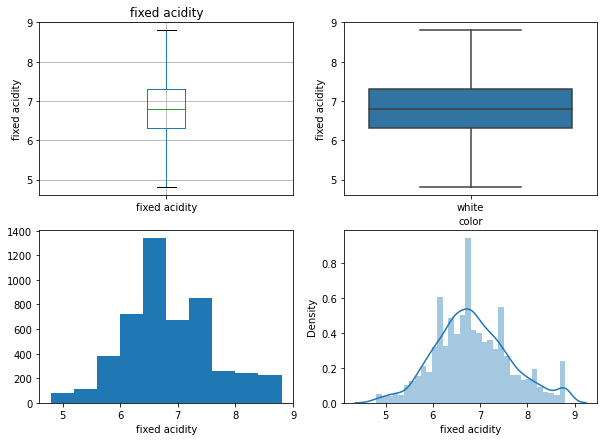

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


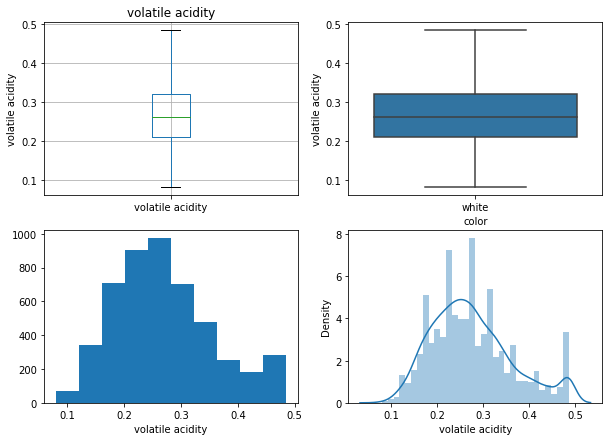

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


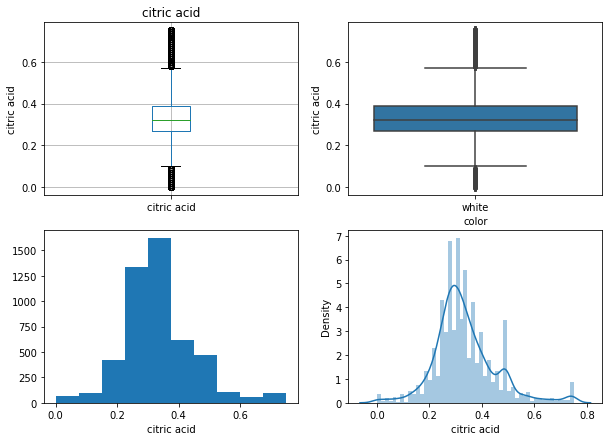

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


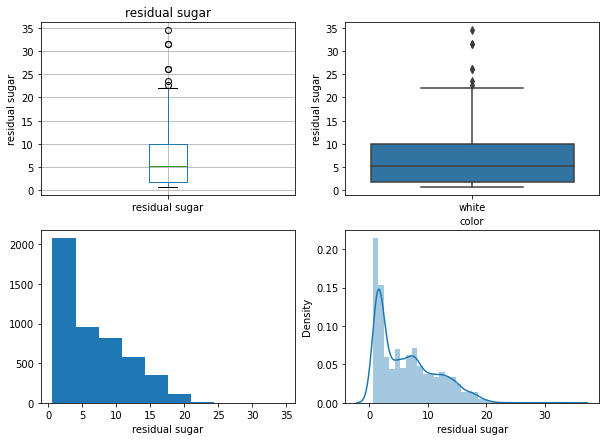

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


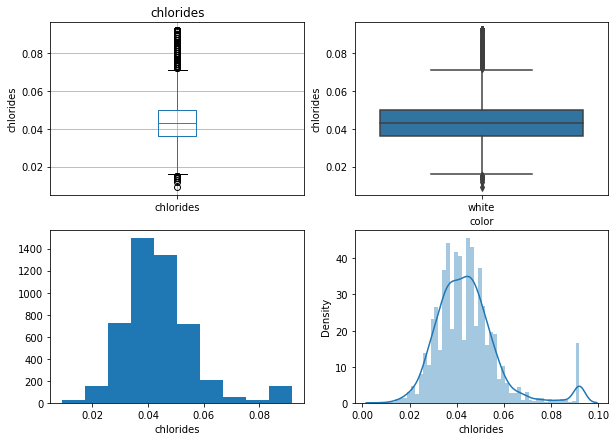

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


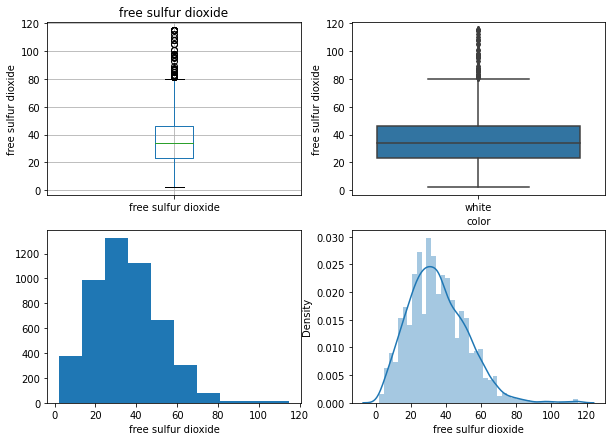

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


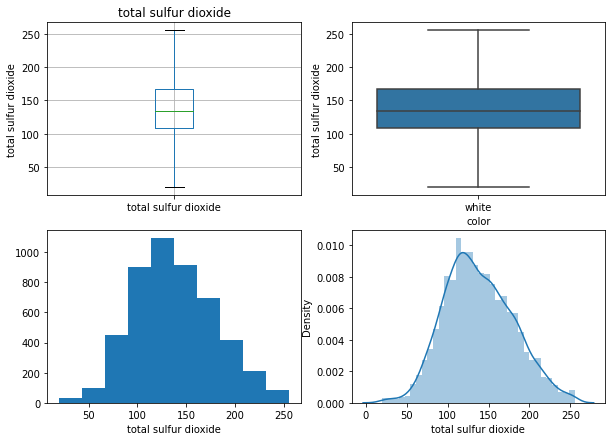

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


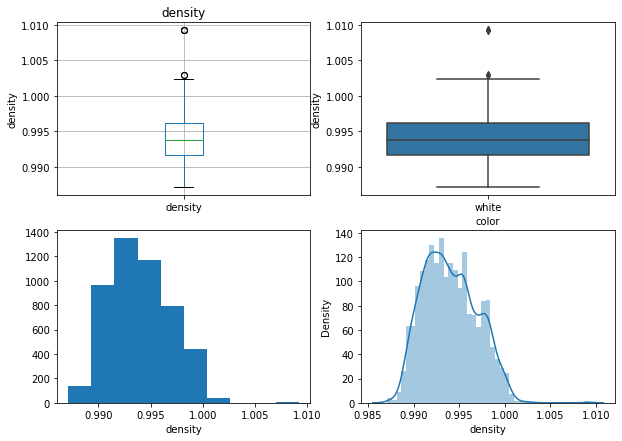

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


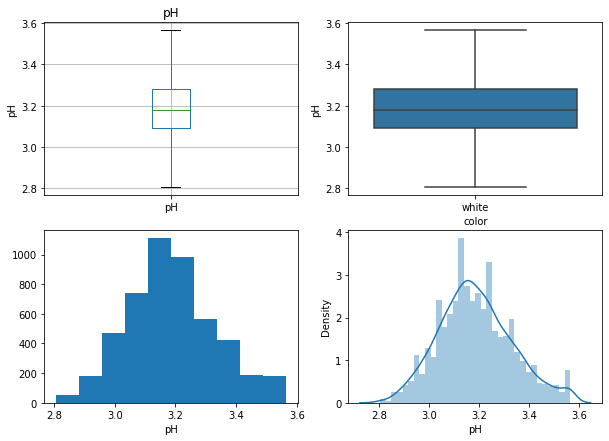

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


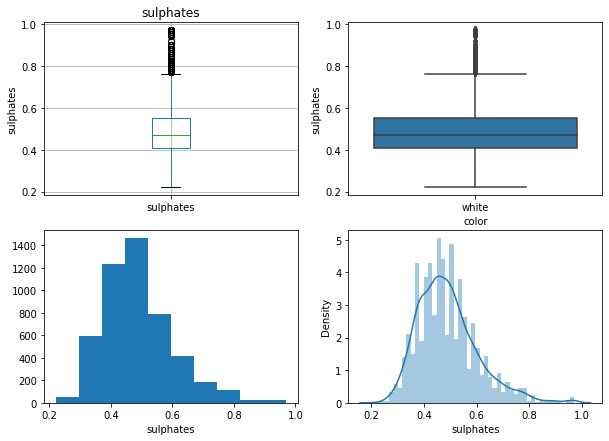

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


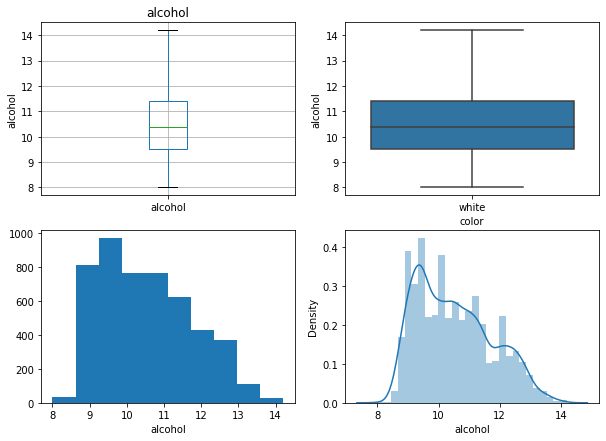

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


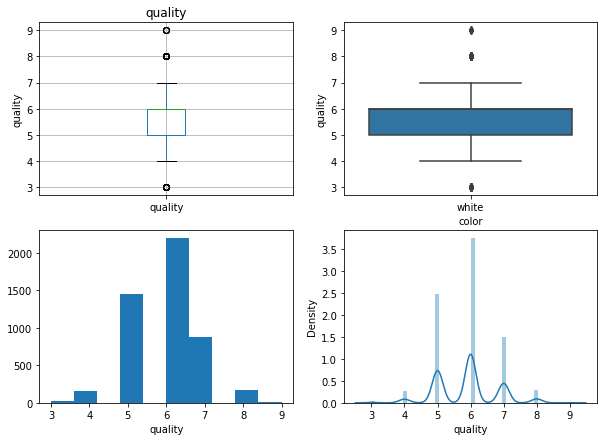

In [19]:
create_boxplots_distplots(df)

In [20]:
df.head(15)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.0              0.27         0.36           20.70      0.045   
1             6.3              0.30         0.34            1.60      0.049   
2             8.1              0.28         0.40            6.90      0.050   
3             7.2              0.23         0.32            8.50      0.058   
4             7.2              0.23         0.32            8.50      0.058   
5             8.1              0.28         0.40            6.90      0.050   
6             6.2              0.32         0.16            7.00      0.045   
7             7.0              0.27         0.36           20.70      0.045   
8             6.3              0.30         0.34            1.60      0.049   
9             8.1              0.22         0.43            1.50      0.044   
10            8.1              0.27         0.41            1.45      0.033   
11            8.6              0.23         0.40            4.20      0.035   
12            7.9              0.18         0.37            1.20      0.040   
13            6.6              0.16         0.40            1.50      0.044   
14            8.3              0.42         0.62           19.25      0.040   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  45.0                 170.0   1.0010  3.00       0.45   
1                  14.0                 132.0   0.9940  3.30       0.49   
2                  30.0                  97.0   0.9951  3.26       0.44   
3                  47.0                 186.0   0.9956  3.19       0.40   
4                  47.0                 186.0   0.9956  3.19       0.40   
5                  30.0                  97.0   0.9951  3.26       0.44   
6                  30.0                 136.0   0.9949  3.18       0.47   
7                  45.0                 170.0   1.0010  3.00       0.45   
8                  14.0                 132.0   0.9940  3.30       0.49   
9                  28.0                 129.0   0.9938  3.22       0.45   
10                 11.0                  63.0   0.9908  2.99       0.56   
11                 17.0                 109.0   0.9947  3.14       0.53   
12                 16.0                  75.0   0.9920  3.18       0.63   
13                 48.0                 143.0   0.9912  3.54       0.52   
14                 41.0                 172.0   1.0002  2.98       0.67   

    alcohol  quality  color  
0       8.8        6  white  
1       9.5        6  white  
2      10.1        6  white  
3       9.9        6  white  
4       9.9        6  white  
5      10.1        6  white  
6       9.6        6  white  
7       8.8        6  white  
8       9.5        6  white  
9      11.0        6  white  
10     12.0        5  white  
11      9.7        5  white  
12     10.8        5  white  
13     12.4        7  white  
14      9.7        5  white

#### Plotting a count of number of samples for respective qualities

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

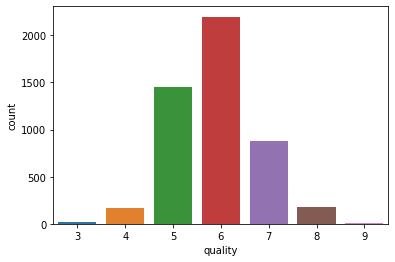

In [21]:
sns.countplot('quality', data=df)

In [22]:
df['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

#### Pie chart showing distribution of qualities

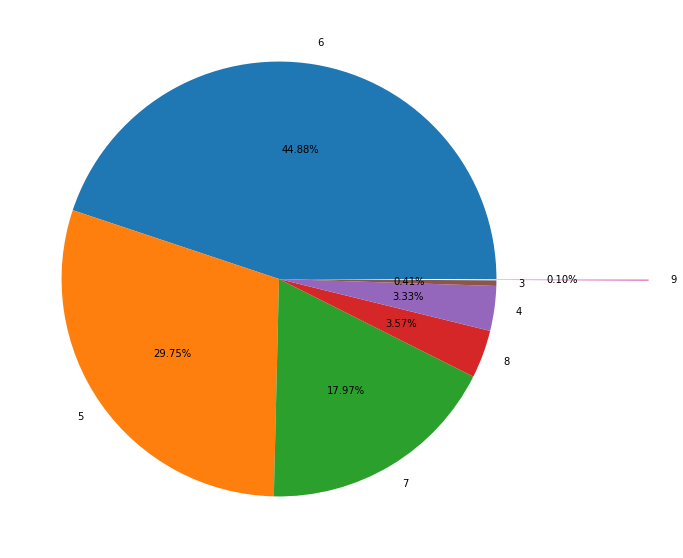

In [23]:
plt.figure(figsize=(15,10))
plt.pie(df['quality'].value_counts(), labels=df['quality'].unique(), autopct='%0.2f%%', explode=(0,0,0,0,0,0,0.7))
plt.show()

#### Determining correlation between the features of the dataset

In [24]:
df.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.034171     0.294855   
volatile acidity          -0.034171          1.000000    -0.147690   
citric acid                0.294855         -0.147690     1.000000   
residual sugar             0.098373          0.064015     0.093928   
chlorides                  0.056484          0.042665     0.088917   
free sulfur dioxide       -0.042476         -0.093074     0.099789   
total sulfur dioxide       0.095110          0.101100     0.123589   
density                    0.274292          0.007237     0.153358   
pH                        -0.426930         -0.040234    -0.168001   
sulphates                 -0.018290         -0.042389     0.066417   
alcohol                   -0.121810          0.075278    -0.081920   
quality                   -0.105773         -0.182478    -0.008669   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.098373   0.056484            -0.042476   
volatile acidity            0.064015   0.042665            -0.093074   
citric acid                 0.093928   0.088917             0.099789   
residual sugar              1.000000   0.176089             0.314894   
chlorides                   0.176089   1.000000             0.129008   
free sulfur dioxide         0.314894   0.129008             1.000000   
total sulfur dioxide        0.410442   0.292897             0.612501   
density                     0.834862   0.398324             0.312931   
pH                         -0.198403  -0.075450            -0.005424   
sulphates                  -0.028972   0.039551             0.058639   
alcohol                    -0.456840  -0.494964            -0.256832   
quality                    -0.098831  -0.276501             0.018301   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.095110  0.274292 -0.426930  -0.018290   
volatile acidity                  0.101100  0.007237 -0.040234  -0.042389   
citric acid                       0.123589  0.153358 -0.168001   0.066417   
residual sugar                    0.410442  0.834862 -0.198403  -0.028972   
chlorides                         0.292897  0.398324 -0.075450   0.039551   
free sulfur dioxide               0.612501  0.312931 -0.005424   0.058639   
total sulfur dioxide              1.000000  0.545640  0.000625   0.133807   
density                           0.545640  1.000000 -0.101411   0.073220   
pH                                0.000625 -0.101411  1.000000   0.153866   
sulphates                         0.133807  0.073220  0.153866   1.000000   
alcohol                          -0.454231 -0.799010  0.123953  -0.018062   
quality                          -0.170402 -0.314154  0.102629   0.053460   

                       alcohol   quality  
fixed acidity        -0.121810 -0.105773  
volatile acidity      0.075278 -0.182478  
citric acid          -0.081920 -0.008669  
residual sugar       -0.456840 -0.098831  
chlorides            -0.494964 -0.276501  
free sulfur dioxide  -0.256832  0.018301  
total sulfur dioxide -0.454231 -0.170402  
density              -0.799010 -0.314154  
pH                    0.123953  0.102629  
sulphates            -0.018062  0.053460  
alcohol               1.000000  0.435575  
quality               0.435575  1.000000

#### Determining correlation between the features of the dataset using a heatmap

<AxesSubplot:>

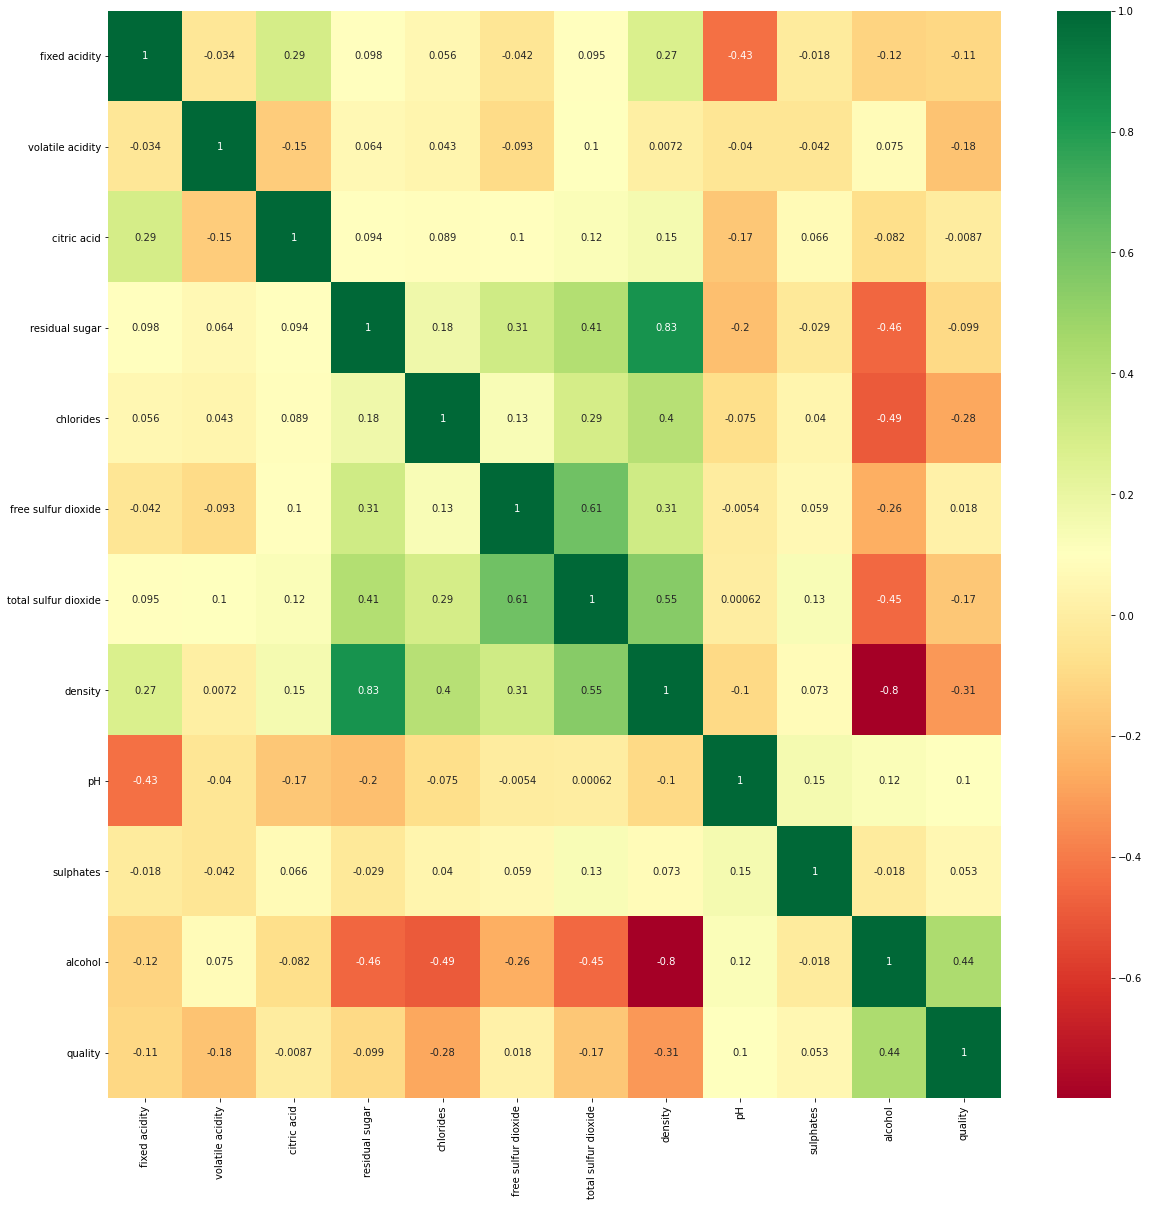

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

** In the above heatmap, if there are any 2 independent features that are highly correlated i.e. 80% or more, then we can drop 1 of those 2 features because both those features are serving the same purpose. We can see that density and 'residual sugar' features have a pearson correlation coefficient of 0.83 i.e. 83% and thus we can drop 1 of these 2 features. But in the dataset of red wines, these 2 features are not strongly correlated and thus we cannot drop 1 amongst these 2features from the red wine dataset. So we will retain these features in the white wine dataset as well**

#### Determining the data types for each column of the dataset

In [26]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [27]:
#b = sns.PairGrid(df)
#b.map(plt.scatter)

#### Identifying and removing duplicate rows in the dataset

In [28]:
df.duplicated(['fixed acidity'])

0       False
1       False
2       False
3       False
4        True
        ...  
4893     True
4894     True
4895     True
4896     True
4897     True
Length: 4898, dtype: bool

In [29]:
df[df.duplicated(['fixed acidity', 'volatile acidity', 'citric acid', 
'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
      'pH', 'sulphates', 'alcohol'])==True]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.2             0.230         0.32             8.5      0.058   
5               8.1             0.280         0.40             6.9      0.050   
7               7.0             0.270         0.36            20.7      0.045   
8               6.3             0.300         0.34             1.6      0.049   
20              6.2             0.485         0.48             1.2      0.029   
...             ...               ...          ...             ...        ...   
4828            6.4             0.230         0.35            10.3      0.042   
4850            7.0             0.360         0.35             2.5      0.048   
4851            6.4             0.330         0.44             8.9      0.055   
4856            7.1             0.230         0.39            13.7      0.058   
4880            6.6             0.340         0.40             8.1      0.046   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
4                    47.0                 186.0  0.99560  3.19       0.40   
5                    30.0                  97.0  0.99510  3.26       0.44   
7                    45.0                 170.0  1.00100  3.00       0.45   
8                    14.0                 132.0  0.99400  3.30       0.49   
20                   29.0                  75.0  0.98920  3.33       0.39   
...                   ...                   ...      ...   ...        ...   
4828                 54.0                 140.0  0.99670  3.23       0.47   
4850                 67.0                 161.0  0.99146  3.05       0.56   
4851                 52.0                 164.0  0.99488  3.10       0.48   
4856                 26.0                 172.0  0.99755  2.90       0.46   
4880                 68.0                 170.0  0.99494  3.15       0.50   

        alcohol  quality  color  
4      9.900000        6  white  
5     10.100000        6  white  
7      8.800000        6  white  
8      9.500000        6  white  
20    12.800000        8  white  
...         ...      ...    ...  
4828   9.200000        5  white  
4850  11.100000        6  white  
4851   9.600000        5  white  
4856   9.000000        6  white  
4880   9.533333        6  white  

[942 rows x 13 columns]

In [30]:
df = df[df.duplicated(['fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])==False]

In [31]:
df.count()

fixed acidity           3956
volatile acidity        3956
citric acid             3956
residual sugar          3956
chlorides               3956
free sulfur dioxide     3956
total sulfur dioxide    3956
density                 3956
pH                      3956
sulphates               3956
alcohol                 3956
quality                 3956
color                   3956
dtype: int64

In [32]:
df.shape

(3956, 13)

#### Determining the count of unique values in each column of the dataset

In [33]:
df.nunique()

fixed acidity            44
volatile acidity         80
citric acid              76
residual sugar          309
chlorides                82
free sulfur dioxide     125
total sulfur dioxide    237
density                 889
pH                       77
sulphates                74
alcohol                 103
quality                   7
color                     1
dtype: int64

#### Plotting a scatterplot matrix of the independent features

In [34]:
#pd.plotting.scatter_matrix(df, alpha=0.1, figsize=(20,20), diagonal='hist', grid=True, )

In [35]:
'''
def create_relplot(dataset):
    features = [feature for feature in dataset.columns if feature != 'color']
    for feature in features:
        for bivariate_feature in features:
            if bivariate_feature != feature:
                plt.figure(figsize=(10,10))
                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue='quality')
                plt.show()


create_relplot(df)
'''

"\ndef create_relplot(dataset):\n    features = [feature for feature in dataset.columns if feature != 'color']\n    for feature in features:\n        for bivariate_feature in features:\n            if bivariate_feature != feature:\n                plt.figure(figsize=(10,10))\n                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue='quality')\n                plt.show()\n\n\ncreate_relplot(df)\n"

In [36]:
#sns.pairplot(df, hue='quality')

#### Removing multivariate outliers

In [37]:
df.shape

(3956, 13)

In [38]:
df[(df['free sulfur dioxide'] > 100) & (df['fixed acidity'] > 8.5)]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3307            8.8              0.24         0.29             8.5      0.037   

      free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
3307                115.0                 208.0  0.99395  2.9       0.38   

      alcohol  quality  color  
3307     11.0        3  white

In [39]:
df = df.drop(df[(df['free sulfur dioxide'] > 100) & (df['fixed acidity'] > 8.5)].index)

In [40]:
df[(df['free sulfur dioxide'] > 100) & (df['fixed acidity'] > 8.5)]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, color]
Index: []

In [41]:
df.shape

(3955, 13)

In [42]:
df[(df['chlorides'] > 0.08) & (df['fixed acidity'] > 8.5)]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2162            8.8             0.485         0.23             2.4      0.087   
3220            8.8             0.380         0.53             2.1      0.092   
3388            8.8             0.390         0.35             1.8      0.092   

      free sulfur dioxide  total sulfur dioxide  density     pH  sulphates  \
2162                 19.0                 115.0  0.99480  2.805       0.44   
3220                 19.0                  76.0  0.99001  2.930       0.57   
3388                 22.0                  80.0  0.99016  2.950       0.54   

      alcohol  quality  color  
2162      9.4        6  white  
3220     12.9        5  white  
3388     12.6        6  white

In [43]:
df = df.drop(df[(df['chlorides'] > 0.08) & (df['fixed acidity'] > 8.5)].index)

In [44]:
df[(df['chlorides'] > 0.08) & (df['fixed acidity'] > 8.5)]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, color]
Index: []

In [45]:
df.shape

(3952, 13)

In [46]:
df[(df['density'] > 1.005)]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1653            7.9             0.330         0.28            31.6      0.053   
2781            7.8             0.485         0.60            34.5      0.074   

      free sulfur dioxide  total sulfur dioxide   density    pH  sulphates  \
1653                 35.0                 176.0  1.009232  3.15       0.38   
2781                  8.0                 160.0  1.009232  3.39       0.69   

      alcohol  quality  color  
1653      8.8        6  white  
2781     11.7        6  white

In [47]:
df = df.drop(df[(df['density'] > 1.005)].index)

In [48]:
df[(df['density'] > 1.005)]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, color]
Index: []

In [49]:
df.shape

(3950, 13)

In [50]:
df[(df['free sulfur dioxide'] > 100) & (df['volatile acidity'] > 0.45)]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1931            7.1             0.485         0.22             2.0      0.047   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1931                115.0                 255.5   0.9924  3.24       0.37   

      alcohol  quality  color  
1931     11.0        3  white

In [51]:
df = df.drop(df[(df['free sulfur dioxide'] > 100) & (df['volatile acidity'] > 0.45)].index)

In [52]:
df[(df['free sulfur dioxide'] > 100) & (df['volatile acidity'] > 0.45)]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, color]
Index: []

In [53]:
df.shape

(3949, 13)

In [54]:
df[(df['free sulfur dioxide'] > 100) & (df['total sulfur dioxide'] > 225)]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
325             7.5             0.270         0.31             5.8      0.057   
659             6.8             0.290         0.16             1.4      0.038   
3050            6.2             0.255         0.24             1.7      0.039   
4745            6.1             0.260         0.25             2.9      0.047   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
325                 115.0                 255.5  0.99460  3.18       0.59   
659                 115.0                 234.5  0.99220  3.15       0.47   
3050                115.0                 255.5  0.99452  3.53       0.53   
4745                115.0                 255.5  0.99314  3.44       0.64   

      alcohol  quality  color  
325      10.5        5  white  
659      10.0        4  white  
3050      9.6        4  white  
4745     10.5        3  white

In [55]:
df = df.drop(df[(df['free sulfur dioxide'] > 100) & (df['total sulfur dioxide'] > 225)].index)

In [56]:
df[(df['free sulfur dioxide'] > 100) & (df['total sulfur dioxide'] > 225)]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, color]
Index: []

In [57]:
df.shape

(3945, 13)

In [58]:
df[(df['free sulfur dioxide'] > 100) & (df['pH'] > 3.4)]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1688            6.7              0.25         0.26            1.55      0.041   
2334            7.5              0.23         0.35           17.80      0.058   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1688                115.0                 216.0  0.99490  3.55       0.63   
2334                115.0                 212.0  1.00241  3.44       0.43   

      alcohol  quality  color  
1688      9.4        3  white  
2334      8.9        5  white

In [59]:
df = df.drop(df[(df['free sulfur dioxide'] > 100) & (df['pH'] > 3.4)].index)

In [60]:
df[(df['free sulfur dioxide'] > 100) & (df['pH'] > 3.4)]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, color]
Index: []

In [61]:
df.shape

(3943, 13)

In [62]:
df[(df['alcohol'] > 13) & (df['total sulfur dioxide'] > 250)]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3152            7.6              0.25         0.75             4.6      0.035   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3152                 51.0                 255.5  0.99018  3.03       0.43   

      alcohol  quality  color  
3152     13.1        6  white

In [63]:
df = df.drop(df[(df['alcohol'] > 13) & (df['total sulfur dioxide'] > 250)].index)

In [64]:
df[(df['alcohol'] > 13) & (df['total sulfur dioxide'] > 250)]

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, color]
Index: []

In [65]:
df.shape

(3942, 13)

In [66]:
#sns.pairplot(df, hue='quality')

In [67]:
df.head(20)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.0             0.270         0.36           20.70      0.045   
1             6.3             0.300         0.34            1.60      0.049   
2             8.1             0.280         0.40            6.90      0.050   
3             7.2             0.230         0.32            8.50      0.058   
6             6.2             0.320         0.16            7.00      0.045   
9             8.1             0.220         0.43            1.50      0.044   
10            8.1             0.270         0.41            1.45      0.033   
11            8.6             0.230         0.40            4.20      0.035   
12            7.9             0.180         0.37            1.20      0.040   
13            6.6             0.160         0.40            1.50      0.044   
14            8.3             0.420         0.62           19.25      0.040   
15            6.6             0.170         0.38            1.50      0.032   
16            6.3             0.480         0.04            1.10      0.046   
17            6.2             0.485         0.48            1.20      0.029   
18            7.4             0.340         0.42            1.10      0.033   
19            6.5             0.310         0.14            7.50      0.044   
21            6.4             0.310         0.38            2.90      0.038   
22            6.8             0.260         0.42            1.70      0.049   
23            7.6             0.485         0.14            1.50      0.074   
24            6.6             0.270         0.41            1.30      0.052   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  45.0                 170.0   1.0010  3.00       0.45   
1                  14.0                 132.0   0.9940  3.30       0.49   
2                  30.0                  97.0   0.9951  3.26       0.44   
3                  47.0                 186.0   0.9956  3.19       0.40   
6                  30.0                 136.0   0.9949  3.18       0.47   
9                  28.0                 129.0   0.9938  3.22       0.45   
10                 11.0                  63.0   0.9908  2.99       0.56   
11                 17.0                 109.0   0.9947  3.14       0.53   
12                 16.0                  75.0   0.9920  3.18       0.63   
13                 48.0                 143.0   0.9912  3.54       0.52   
14                 41.0                 172.0   1.0002  2.98       0.67   
15                 28.0                 112.0   0.9914  3.25       0.55   
16                 30.0                  99.0   0.9928  3.24       0.36   
17                 29.0                  75.0   0.9892  3.33       0.39   
18                 17.0                 171.0   0.9917  3.12       0.53   
19                 34.0                 133.0   0.9955  3.22       0.50   
21                 19.0                 102.0   0.9912  3.17       0.35   
22                 41.0                 122.0   0.9930  3.47       0.48   
23                 25.0                 168.0   0.9937  3.05       0.51   
24                 16.0                 142.0   0.9951  3.42       0.47   

    alcohol  quality  color  
0       8.8        6  white  
1       9.5        6  white  
2      10.1        6  white  
3       9.9        6  white  
6       9.6        6  white  
9      11.0        6  white  
10     12.0        5  white  
11      9.7        5  white  
12     10.8        5  white  
13     12.4        7  white  
14      9.7        5  white  
15     11.4        7  white  
16      9.6        6  white  
17     12.8        8  white  
18     11.3        6  white  
19      9.5        5  white  
21     11.0        7  white  
22     10.5        8  white  
23      9.3        5  white  
24     10.0        6  white

#### Checking for skewness

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


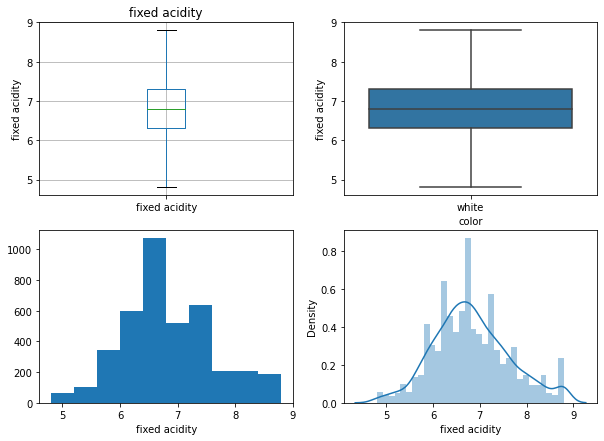

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


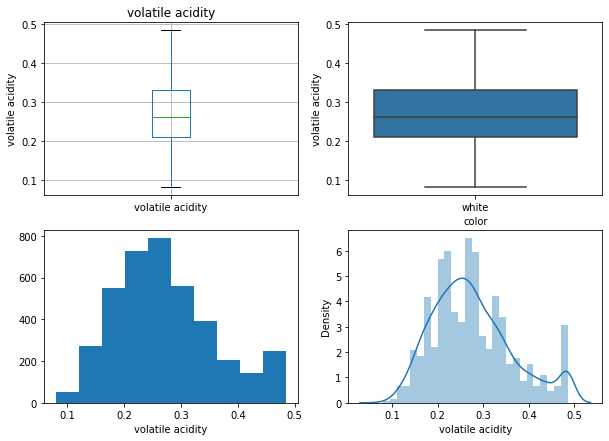

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


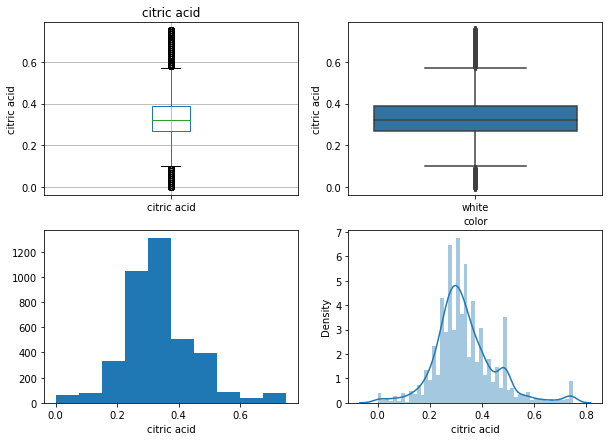

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


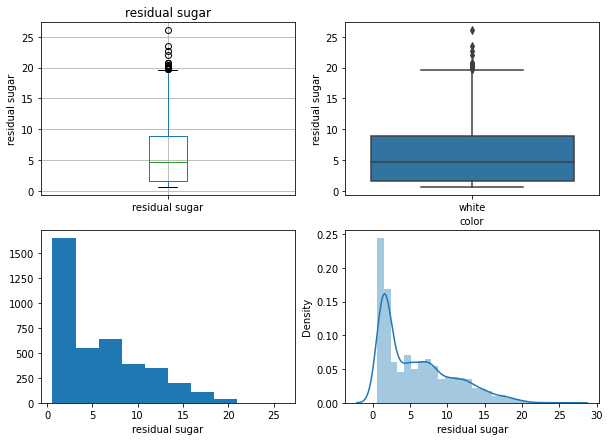

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


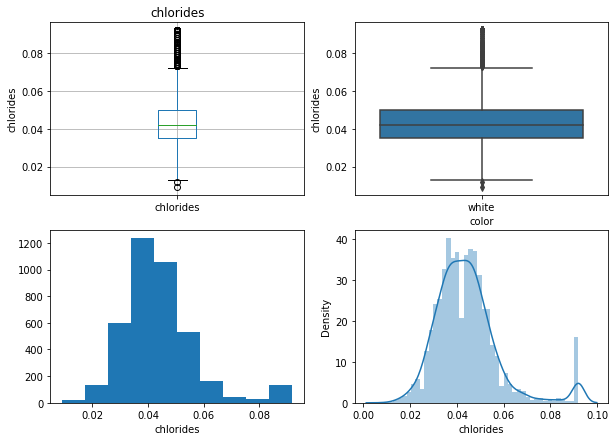

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


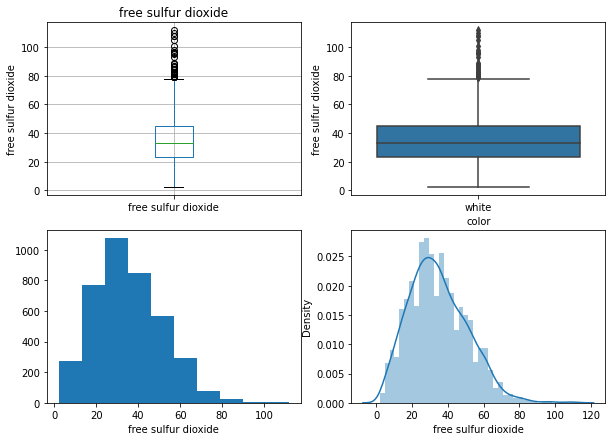

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


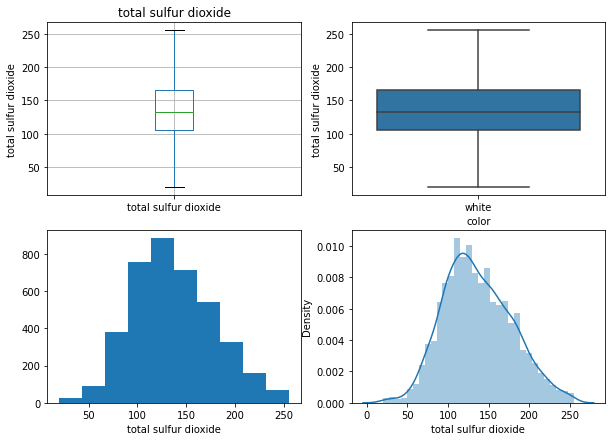

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


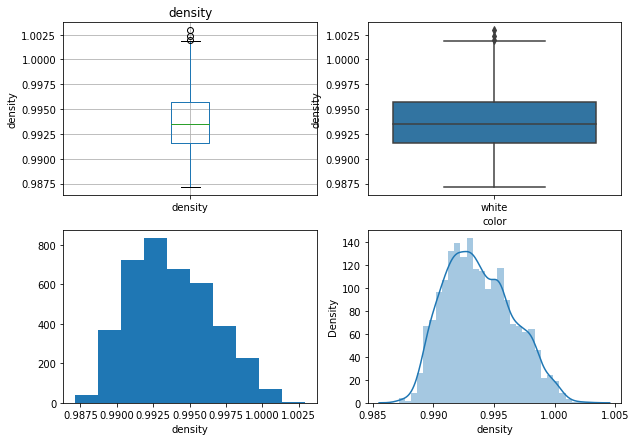

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


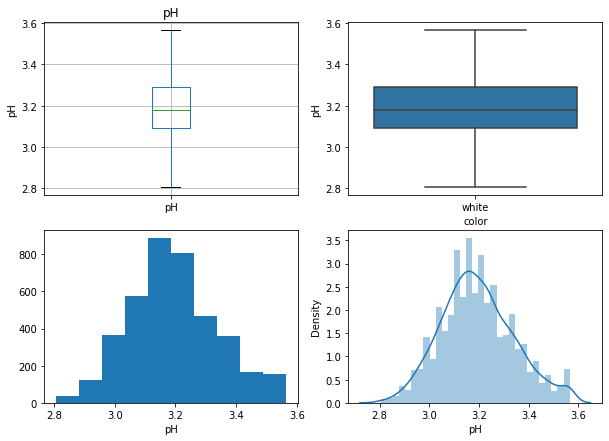

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


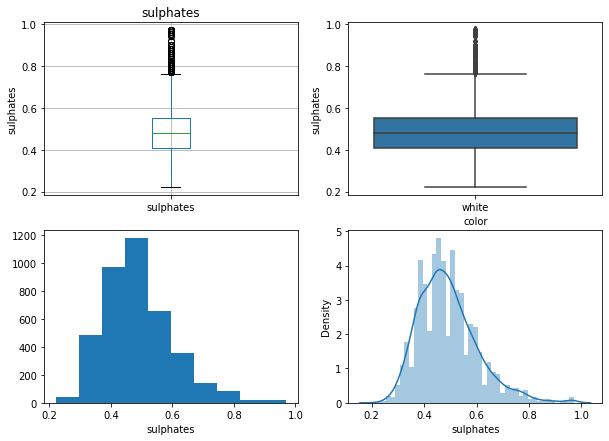

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


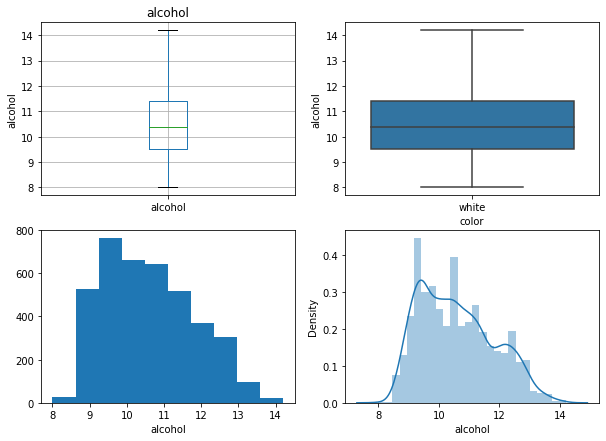

/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


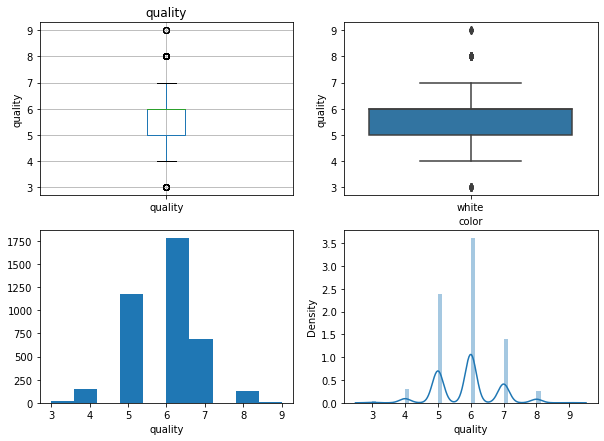

In [68]:
create_boxplots_distplots(df)

**Skewness scores to determine skewness in the column**

From the distplots, it can be observed that the feature columns **free sulfur dioxide**, **sulphates**, **chlorides**, **citric acid** and **alcohol** are considerably positively skewed. From the heatmap, it can be seen that  **free sulfur dioxide**, **sulphates**, **chlorides** and **citric acid** have weak correlation with **quality** whereas **alcohol** has moderate correlation with **quality**. So we will remove skewness from **free sulfur dioxide**, **sulphates**, **chlorides** and **citric acid** by performing square root transformation

0.29594660798879563
/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fixed acidity log', ylabel='Density'>

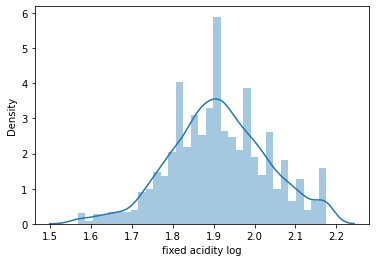

In [69]:
from scipy.stats import skew
print(skew(df['fixed acidity']))
df['fixed acidity log'] = np.log(df['fixed acidity'])
sns.distplot(df['fixed acidity log'].dropna())

0.5758945168951264
/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='free sulfur dioxide sqrt', ylabel='Density'>

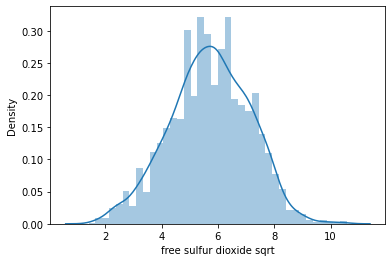

In [70]:
print(skew(df['free sulfur dioxide']))
df['free sulfur dioxide sqrt'] = np.sqrt(df['free sulfur dioxide'])
sns.distplot(df['free sulfur dioxide sqrt'].dropna())

0.892305461782068
/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual sugar sqrt', ylabel='Density'>

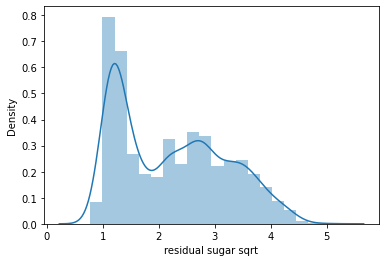

In [71]:
print(skew(df['residual sugar']))
df['residual sugar sqrt'] = np.sqrt(df['residual sugar'])
sns.distplot(df['residual sugar sqrt'].dropna())

0.9075836847637325
/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sulphates log', ylabel='Density'>

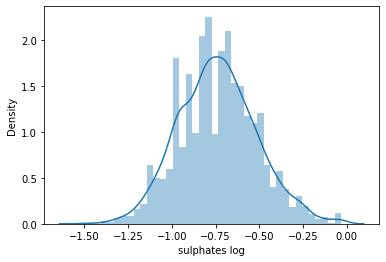

In [72]:
print(skew(df['sulphates']))
df['sulphates log'] = np.log(df['sulphates'])
sns.distplot(df['sulphates log'].dropna())

0.4492359688499927
/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='alcohol sqrt', ylabel='Density'>

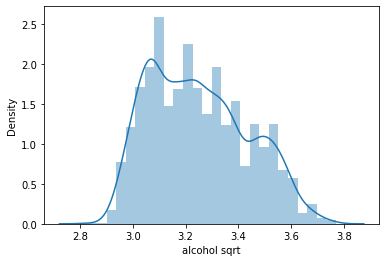

In [73]:
print(skew(df['alcohol']))
df['alcohol sqrt'] = np.sqrt(df['alcohol'])
sns.distplot(df['alcohol sqrt'].dropna())

0.2820870479708188
/home/vishesh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total sulfur dioxide sqrt', ylabel='Density'>

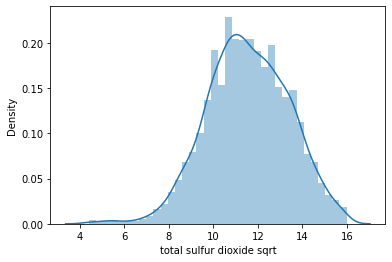

In [74]:
print(skew(df['total sulfur dioxide']))
df['total sulfur dioxide sqrt'] = np.sqrt(df['total sulfur dioxide'])
sns.distplot(df['total sulfur dioxide sqrt'].dropna())

In [75]:
df.head(20)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.0             0.270         0.36           20.70      0.045   
1             6.3             0.300         0.34            1.60      0.049   
2             8.1             0.280         0.40            6.90      0.050   
3             7.2             0.230         0.32            8.50      0.058   
6             6.2             0.320         0.16            7.00      0.045   
9             8.1             0.220         0.43            1.50      0.044   
10            8.1             0.270         0.41            1.45      0.033   
11            8.6             0.230         0.40            4.20      0.035   
12            7.9             0.180         0.37            1.20      0.040   
13            6.6             0.160         0.40            1.50      0.044   
14            8.3             0.420         0.62           19.25      0.040   
15            6.6             0.170         0.38            1.50      0.032   
16            6.3             0.480         0.04            1.10      0.046   
17            6.2             0.485         0.48            1.20      0.029   
18            7.4             0.340         0.42            1.10      0.033   
19            6.5             0.310         0.14            7.50      0.044   
21            6.4             0.310         0.38            2.90      0.038   
22            6.8             0.260         0.42            1.70      0.049   
23            7.6             0.485         0.14            1.50      0.074   
24            6.6             0.270         0.41            1.30      0.052   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  45.0                 170.0   1.0010  3.00       0.45   
1                  14.0                 132.0   0.9940  3.30       0.49   
2                  30.0                  97.0   0.9951  3.26       0.44   
3                  47.0                 186.0   0.9956  3.19       0.40   
6                  30.0                 136.0   0.9949  3.18       0.47   
9                  28.0                 129.0   0.9938  3.22       0.45   
10                 11.0                  63.0   0.9908  2.99       0.56   
11                 17.0                 109.0   0.9947  3.14       0.53   
12                 16.0                  75.0   0.9920  3.18       0.63   
13                 48.0                 143.0   0.9912  3.54       0.52   
14                 41.0                 172.0   1.0002  2.98       0.67   
15                 28.0                 112.0   0.9914  3.25       0.55   
16                 30.0                  99.0   0.9928  3.24       0.36   
17                 29.0                  75.0   0.9892  3.33       0.39   
18                 17.0                 171.0   0.9917  3.12       0.53   
19                 34.0                 133.0   0.9955  3.22       0.50   
21                 19.0                 102.0   0.9912  3.17       0.35   
22                 41.0                 122.0   0.9930  3.47       0.48   
23                 25.0                 168.0   0.9937  3.05       0.51   
24                 16.0                 142.0   0.9951  3.42       0.47   

    alcohol  quality  color  fixed acidity log  free sulfur dioxide sqrt  \
0       8.8        6  white           1.945910                  6.708204   
1       9.5        6  white           1.840550                  3.741657   
2      10.1        6  white           2.091864                  5.477226   
3       9.9        6  white           1.974081                  6.855655   
6       9.6        6  white           1.824549                  5.477226   
9      11.0        6  white           2.091864                  5.291503   
10     12.0        5  white           2.091864                  3.316625   
11      9.7        5  white           2.151762                  4.123106   
12     10.8        5  white           2.066863                  4.000000   
13     1

In [76]:
df.isnull().sum()

fixed acidity                0
volatile acidity             0
citric acid                  0
residual sugar               0
chlorides                    0
free sulfur dioxide          0
total sulfur dioxide         0
density                      0
pH                           0
sulphates                    0
alcohol                      0
quality                      0
color                        0
fixed acidity log            0
free sulfur dioxide sqrt     0
residual sugar sqrt          0
sulphates log                0
alcohol sqrt                 0
total sulfur dioxide sqrt    0
dtype: int64

## Reading the dataset of red wines

In [77]:
df1 = pd.read_csv('winequality-red.csv', sep=';')

FileNotFoundError: [Errno 2] No such file or directory: 'winequality-red.csv'

In [ ]:
df1.head(10)

In [ ]:
df1['color'] = 'red'

In [ ]:
df1.head(10)

In [ ]:
df1.describe().transpose()

In [ ]:
df1.info()

In [ ]:
df1['color'].unique()

In [ ]:
df1.count()

In [ ]:
df1['quality'].unique()

In [ ]:
df1.isnull().sum()

In [ ]:
create_boxplots_distplots(df1)

In [ ]:
features = ['residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality']    
remove_extreme_outliers(df1, features)

In [ ]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'density']
remove_outliers(df1, features)

In [ ]:
create_boxplots_distplots(df1)

In [ ]:
df1.head(10)

In [ ]:
sns.countplot('quality', data=df1)

In [ ]:
df1['quality'].value_counts()

In [ ]:
plt.figure(figsize=(15,10))
plt.pie(df1['quality'].value_counts(), labels=df1['quality'].unique(), autopct='%0.2f%%', explode=(0,0,0,0,0,0.7))
plt.show()

In [ ]:
df1.corr()

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(), annot=True, cmap="RdYlGn")

In [ ]:
df1.dtypes

In [ ]:
#b = sns.PairGrid(df1)
#b.map(plt.scatter)

In [ ]:
df1.duplicated(['fixed acidity'])

In [ ]:
df1[df1.duplicated(['fixed acidity', 'volatile acidity', 'citric acid', 
'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
      'pH', 'sulphates', 'alcohol'])==True]

In [ ]:
df1 = df1[df1.duplicated(['fixed acidity', 'volatile acidity', 'citric acid',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])==False]

In [ ]:
df1.count()

In [ ]:
df1.shape

In [ ]:
df1.nunique()

In [ ]:
#pd.plotting.scatter_matrix(df1, alpha=0.1, figsize=(20,20), diagonal='hist', grid=True, )

In [ ]:
'''
def create_relplot(dataset):
    features = [feature for feature in dataset.columns if feature != 'color']
    for feature in features:
        for bivariate_feature in features:
            if bivariate_feature != feature:
                plt.figure(figsize=(10,10))
                sns.relplot(x=feature, y=bivariate_feature, data=dataset, hue='quality')
                plt.show()


create_relplot(df1)
'''

In [ ]:
#sns.pairplot(df1, hue='quality')

In [ ]:
df1.shape

In [ ]:
df1[(df1['free sulfur dioxide'] > 50) & (df1['fixed acidity'] > 11)]

In [ ]:
df1 = df1.drop(df1[(df1['free sulfur dioxide'] > 50) & (df1['fixed acidity'] > 11)].index)

In [ ]:
df1[(df1['free sulfur dioxide'] > 50) & (df1['fixed acidity'] > 11)]

In [ ]:
df1.shape

In [ ]:
df1[(df1['total sulfur dioxide'] > 175)]

In [ ]:
df1 = df1.drop(df1[(df1['total sulfur dioxide'] > 175)].index)

In [ ]:
df1[(df1['total sulfur dioxide'] > 175)]

In [ ]:
df1.shape

In [ ]:
df1[(df1['sulphates'] > 1.2) & (df1['fixed acidity'] > 12)]

In [ ]:
df1 = df1.drop(df1[(df1['sulphates'] > 1.2) & (df1['fixed acidity'] > 12)].index)

In [ ]:
df1[(df1['sulphates'] > 1.2) & (df1['fixed acidity'] > 12)]

In [ ]:
df1.shape

In [ ]:
df1[(df1['alcohol'] > 14) & (df1['fixed acidity'] > 12)]

In [ ]:
df1 = df1.drop(df1[(df1['alcohol'] > 14) & (df1['fixed acidity'] > 12)].index)

In [ ]:
df1[(df1['alcohol'] > 14) & (df1['fixed acidity'] > 12)]

In [ ]:
df1.shape

In [ ]:
df1[(df1['citric acid'] > 0.3) & (df1['volatile acidity'] > 1.2)]

In [ ]:
df1 = df1.drop(df1[(df1['citric acid'] > 0.3) & (df1['volatile acidity'] > 1.2)].index)

In [ ]:
df1[(df1['citric acid'] > 0.3) & (df1['volatile acidity'] > 1.2)]

In [ ]:
df1.shape

In [ ]:
df1[(df1['residual sugar'] > 4) & (df1['volatile acidity'] > 1.1)]

In [ ]:
df1 = df1.drop(df1[(df1['residual sugar'] > 4) & (df1['volatile acidity'] > 1.1)].index)

In [ ]:
df1[(df1['residual sugar'] > 4) & (df1['volatile acidity'] > 1.1)]

In [ ]:
df1.shape

In [ ]:
df1[(df1['chlorides'] > 0.12) & (df1['volatile acidity'] > 1.2)]

In [ ]:
df1 = df1.drop(df1[(df1['chlorides'] > 0.12) & (df1['volatile acidity'] > 1.2)].index)

In [ ]:
df1[(df1['chlorides'] > 0.12) & (df1['volatile acidity'] > 1.2)]

In [ ]:
df1.shape

In [ ]:
df1[(df1['free sulfur dioxide'] > 60)]

In [ ]:
df1 = df1.drop(df1[(df1['free sulfur dioxide'] > 60)].index)

In [ ]:
df1[(df1['free sulfur dioxide'] > 60)]

In [ ]:
df1.shape

In [ ]:
df1[(df1['volatile acidity'] > 1.2)]

In [ ]:
df1 = df1.drop(df1[(df1['volatile acidity'] > 1.2)].index)

In [ ]:
df1[(df1['volatile acidity'] > 1.2)]

In [ ]:
df1.shape

In [ ]:
df1[(df1['chlorides'] > 0.14) & (df1['residual sugar'] > 4.5)]

In [ ]:
df1 = df1.drop(df1[(df1['chlorides'] > 0.14) & (df1['residual sugar'] > 4.5)].index)

In [ ]:
df1[(df1['chlorides'] > 0.14) & (df1['residual sugar'] > 4.5)]

In [ ]:
df1.shape

In [ ]:
df1.head(20)

#### Handle skewness

In [ ]:
create_boxplots_distplots(df1)

In [ ]:
print(skew(df1['fixed acidity']))
df1['fixed acidity log'] = np.log(df1['fixed acidity'])
sns.distplot(df1['fixed acidity log'].dropna())

In [ ]:
print(skew(df1['free sulfur dioxide']))
df1['free sulfur dioxide sqrt'] = np.sqrt(df1['free sulfur dioxide'])
sns.distplot(df1['free sulfur dioxide sqrt'].dropna())

In [ ]:
print(skew(df1['residual sugar']))
df1['residual sugar sqrt'] = np.sqrt(df1['residual sugar'])
sns.distplot(df1['residual sugar sqrt'].dropna())

In [ ]:
print(skew(df1['free sulfur dioxide']))
df1['free sulfur dioxide sqrt'] = np.sqrt(df1['free sulfur dioxide'])
sns.distplot(df1['free sulfur dioxide sqrt'].dropna())

In [ ]:
print(skew(df1['total sulfur dioxide']))
df1['total sulfur dioxide sqrt'] = np.sqrt(df1['total sulfur dioxide'])
sns.distplot(df1['total sulfur dioxide sqrt'].dropna())

In [ ]:
print(skew(df1['sulphates']))
df1['sulphates log'] = np.log(df1['sulphates'])
sns.distplot(df1['sulphates log'].dropna())

In [ ]:
print(skew(df1['alcohol']))
df1['alcohol sqrt'] = np.sqrt(df1['alcohol'])
sns.distplot(df1['alcohol sqrt'].dropna())

In [ ]:
print(skew(df1['total sulfur dioxide']))
df1['total sulfur dioxide sqrt'] = np.sqrt(df1['total sulfur dioxide'])
sns.distplot(df1['total sulfur dioxide sqrt'].dropna())

In [ ]:
df1.head(20)

In [ ]:
df1.isnull().sum()

In [ ]:
df2 = pd.concat([df, df1])

In [ ]:
df2

In [ ]:
sns.countplot(y='quality', data=df2, hue='color')

In [ ]:
plt.figure(figsize=(15,10))
plt.pie(df2['quality'].value_counts(), labels=df2['quality'].unique(), autopct='%0.2f%%', explode=(0,0,0,0,0,1.5,0.7))
plt.show()

#### One hot encoding of color feature

In [ ]:
df3 = pd.get_dummies(df2, drop_first=True)

In [ ]:
df3

In [ ]:
df3.isnull().sum()

In [ ]:
X = df3.drop(columns=["fixed acidity", "free sulfur dioxide", "residual sugar", "sulphates", "alcohol", "total sulfur dioxide", "quality"], axis=1)
y = df3.quality

In [ ]:
X

In [ ]:
y

#### Splitting the dataset into training and testing datasets

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle=True)
'''
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.3, random_state = 42)
for train_index, test_index in split.split(df3, df3['color_white']):
    strat_train_set = df3.loc[train_index]
    strat_test_set = df3.loc[test_index]
    '''

In [ ]:
X_train.shape

In [ ]:
X_train

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
y_train.unique()

In [ ]:
y_train.value_counts()

In [ ]:
from collections import Counter
Counter(y_train)

In [ ]:
plt.figure(figsize=(15,10))
plt.pie(X_train['color_white'].value_counts(), labels=X_train['color_white'].unique(), autopct='%0.2f%%')
#plt.pie(y_train['quality'].value_counts(), labels=y_train['quality'].unique(), autopct='%0.2f%%')
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
plt.pie(X_test['color_white'].value_counts(), labels=X_test['color_white'].unique(), autopct='%0.2f%%')
#plt.pie(y_test['quality'].value_counts(), labels=y_test['quality'].unique(), autopct='%0.2f%%')
plt.show()

#### Creating a RandomForestClassifier model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
y_pred = classifier.predict(X_test)
#print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

*The accuracy score is very less. We need to improve this accuracy score. To improve the accuracy, we can perform Hyperparameter tuning*

#### Hyperparameter tuning

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

In [ ]:
#Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

random_grid

In [ ]:
rfc = RandomForestClassifier()
rsc = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, scoring = 'accuracy', n_iter = 10, cv = 5, random_state = 42, verbose = 2)

In [ ]:
rsc.fit(X_train, y_train)

In [ ]:
prediction = rsc.predict(X_test)
prediction

In [ ]:
y_test

In [ ]:
rsc.best_params_

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(y_test - prediction)
plt.show()

In [ ]:
metrics.r2_score(y_test, prediction)